### Import librairies

In [1]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [2]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

### Importing the IMDB dataset

In [3]:
imdb, info = tfds.load("imdb_reviews",
                      with_info=True, as_supervised=True)

No config specified, defaulting to first: imdb_reviews/plain_text
Load dataset info from C:\Users\tarik\tensorflow_datasets\imdb_reviews\plain_text\1.0.0
Reusing dataset imdb_reviews (C:\Users\tarik\tensorflow_datasets\imdb_reviews\plain_text\1.0.0)
Constructing tf.data.Dataset imdb_reviews for split None, from C:\Users\tarik\tensorflow_datasets\imdb_reviews\plain_text\1.0.0


### Set training and test data in separate variables

In [4]:
train_data, test_data = imdb['train'], imdb['test']

In [5]:
train_data, test_data = imdb['train'], imdb['test']

### Data Preprocessing

`Having all the texts as a list and labels as a separate list will be helpful. 
So, training sentences and labels and testing sentences and labels are retrieved as lists here:`

In [6]:
training_sentences = []
training_labels = []
testing_sentences = []
testing_labels = []
for s,l in train_data:
    training_sentences.append(str(s.numpy()))
    training_labels.append(l.numpy())
for s,l in test_data:
    testing_sentences.append(str(s.numpy()))
    testing_labels.append(l.numpy())

Converting the labels as NumPy arrays

In [7]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

`Here I am setting some important parameters necessary for the model. I will explain what they are after this`

In [8]:
vocab_size = 10000
embedding_dim=16
max_length = 120
trunc_type= 'post'
oov_tok="<OOV>"

Data preprocessing is started by tokenizing the texts in NLP projects

`Here is part of the output for word_index`

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'the': 2,
 'and': 3,
 'a': 4,
 'of': 5,
 'to': 6,
 'is': 7,
 'br': 8,
 'in': 9,
 'it': 10,
 'i': 11,
 'this': 12,
 'that': 13,
 'was': 14,
 'as': 15,
 'for': 16,
 'with': 17,
 'movie': 18,
 'but': 19,
 'film': 20,
 "'s": 21,
 'on': 22,
 'you': 23,
 'not': 24,
 'are': 25,
 'his': 26,
 'he': 27,
 'have': 28,
 'be': 29,
 'one': 30,
 'all': 31,
 'at': 32,
 'by': 33,
 'they': 34,
 'an': 35,
 'who': 36,
 'so': 37,
 'from': 38,
 'like': 39,
 'her': 40,
 "'t": 41,
 'or': 42,
 'just': 43,
 'there': 44,
 'about': 45,
 'out': 46,
 "'": 47,
 'has': 48,
 'if': 49,
 'some': 50,
 'what': 51,
 'good': 52,
 'more': 53,
 'very': 54,
 'when': 55,
 'she': 56,
 'up': 57,
 'can': 58,
 'b': 59,
 'time': 60,
 'no': 61,
 'even': 62,
 'my': 63,
 'would': 64,
 'which': 65,
 'story': 66,
 'only': 67,
 'really': 68,
 'see': 69,
 'their': 70,
 'had': 71,
 'were': 72,
 'me': 73,
 'well': 74,
 'we': 75,
 'than': 76,
 'much': 77,
 'been': 78,
 'get': 79,
 'bad': 80,
 'will': 81,
 'people': 82,
 'do': 83,

So, we have a unique integer value for each word. Here we are arranging our sentences using these integer values instead of words

In [21]:
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, 
                       truncating = trunc_type)
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length)

The first model will be a simple Recurrent Neural Network model

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                             input_length=max_length),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1568      
                                                                 
 dense (Dense)               (None, 10)                330       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 161,909
Trainable params: 161,909
Non-trainable params: 0
_________________________________________________________________


Look at the output shape of each layer. The first layer output shape is (120, 16). 

Remember our max_length for each sentence was 120 and the embedding dimension was 16. Please feel free to change these numbers and check the results.

In the second layer, we put 32 as the parameter in the SimpleRNN layer and the output shape is also 32.

Here we will compile the model using the loss function of binary_crossentropy, ‘adam’ optimizer, and the evaluation metric as the accuracy.

In [12]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

train the model for 30 epochs

In [13]:
num_epochs=30
history=model.fit(padded, training_labels_final, 
                  epochs=num_epochs, validation_data = (testing_padded, testing_labels_final))

Epoch 1/30
782/782 [==============================] - 40s 49ms/step - loss: 0.6393 - accuracy: 0.6192 - val_loss: 0.6376 - val_accuracy: 0.6345
Epoch 2/30
782/782 [==============================] - 37s 48ms/step - loss: 0.5677 - accuracy: 0.7063 - val_loss: 0.5159 - val_accuracy: 0.7666
Epoch 3/30
782/782 [==============================] - 34s 43ms/step - loss: 0.4752 - accuracy: 0.7864 - val_loss: 0.4434 - val_accuracy: 0.8090
Epoch 4/30
782/782 [==============================] - 37s 48ms/step - loss: 0.4456 - accuracy: 0.8039 - val_loss: 0.4414 - val_accuracy: 0.8104
Epoch 5/30
782/782 [==============================] - 38s 48ms/step - loss: 0.3815 - accuracy: 0.8446 - val_loss: 0.4444 - val_accuracy: 0.8140
Epoch 6/30
782/782 [==============================] - 37s 48ms/step - loss: 0.3555 - accuracy: 0.8598 - val_loss: 0.4827 - val_accuracy: 0.8064
Epoch 7/30
782/782 [==============================] - 34s 44ms/step - loss: 0.3357 - accuracy: 0.8667 - val_loss: 0.5261 - val_accuracy:

After 30 epochs training accuracy becomes 1.00 or 100%. But the validation accuracy is 71.74%. Not that bad. But huge overfitting issue.

It will be good to see how accuracies and losses changed with each epoch.

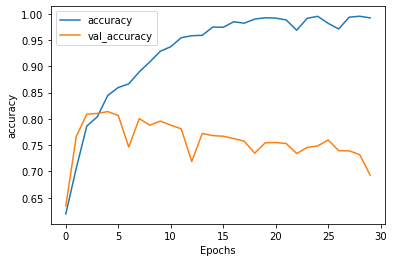

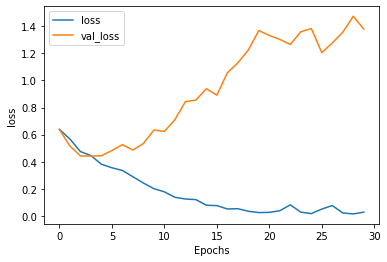

In [14]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

Gated Recurrent Unit (GRU)

This is an improved version of the RNN model. It is more efficient than SimpleRNN models. It has two gates: reset and update. For this demonstration, I will replace the SimpleRNN layer with a bidirectional GRU layer with the same number of units.

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                             input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               9600      
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 170,261
Trainable params: 170,261
Non-trainable params: 0
_________________________________________________________________


The model exactly with the same parameters as before and also train the model for the same number of epochs

In [16]:
model.compile(loss="binary_crossentropy",
             optimizer='adam',
             metrics=['accuracy'])
history=model.fit(padded, training_labels_final, epochs=num_epochs,
            validation_data = (testing_padded,testing_labels_final))

Epoch 1/30
782/782 [==============================] - 81s 95ms/step - loss: 0.5399 - accuracy: 0.6988 - val_loss: 0.3605 - val_accuracy: 0.8432
Epoch 2/30
782/782 [==============================] - 73s 93ms/step - loss: 0.3078 - accuracy: 0.8747 - val_loss: 0.3995 - val_accuracy: 0.8408
Epoch 3/30
782/782 [==============================] - 72s 93ms/step - loss: 0.2342 - accuracy: 0.9123 - val_loss: 0.3833 - val_accuracy: 0.8374
Epoch 4/30
782/782 [==============================] - 74s 94ms/step - loss: 0.1752 - accuracy: 0.9348 - val_loss: 0.4546 - val_accuracy: 0.8302
Epoch 5/30
782/782 [==============================] - 75s 96ms/step - loss: 0.1294 - accuracy: 0.9544 - val_loss: 0.5948 - val_accuracy: 0.8214
Epoch 6/30
782/782 [==============================] - 76s 97ms/step - loss: 0.0946 - accuracy: 0.9672 - val_loss: 0.6406 - val_accuracy: 0.8181
Epoch 7/30
782/782 [==============================] - 80s 102ms/step - loss: 0.0648 - accuracy: 0.9791 - val_loss: 0.7649 - val_accuracy

There is still an overfitting issue. But in the NLP projects, some overfitting is normal. Because no matter what are the words bank in your training set, validation data may still have some new words.

A plot of accuracy and losses per epoch will show a better picture of how with each epoch accuracies and losses changed. I will use the plot_graphs function from the previous section to plot the graphs.

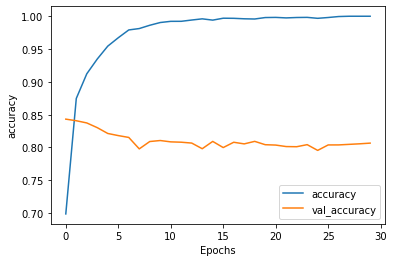

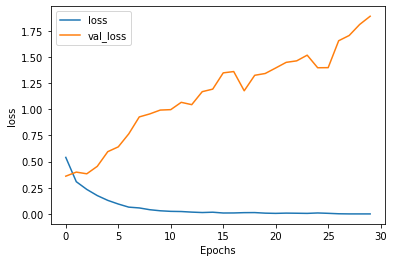

In [17]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

Long Short Term Model (LSTM)

I wanted to show the implementation of an LSTM model as well. The main difference between an LSTM model and a GRU model is, LSTM model has three gates (input, output, and forget gates) whereas the GRU model has two gates as mentioned before.

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               12544     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 173,205
Trainable params: 173,205
Non-trainable params: 0
_________________________________________________________________


I will train for 30 epochs again

In [19]:
num_epochs=30
history = model.fit(padded, training_labels_final, 
                    epochs=num_epochs, validation_data = (testing_padded, testing_labels_final))

Epoch 1/30
782/782 [==============================] - 99s 118ms/step - loss: 0.4650 - accuracy: 0.7679 - val_loss: 0.3491 - val_accuracy: 0.8517
Epoch 2/30
782/782 [==============================] - 86s 110ms/step - loss: 0.2987 - accuracy: 0.8800 - val_loss: 0.3697 - val_accuracy: 0.8455
Epoch 3/30
782/782 [==============================] - 89s 114ms/step - loss: 0.2369 - accuracy: 0.9102 - val_loss: 0.4270 - val_accuracy: 0.8350
Epoch 4/30
782/782 [==============================] - 94s 120ms/step - loss: 0.1919 - accuracy: 0.9301 - val_loss: 0.4532 - val_accuracy: 0.8309
Epoch 5/30
782/782 [==============================] - 77s 99ms/step - loss: 0.1603 - accuracy: 0.9420 - val_loss: 0.6255 - val_accuracy: 0.8171
Epoch 6/30
782/782 [==============================] - 88s 113ms/step - loss: 0.1287 - accuracy: 0.9545 - val_loss: 0.6044 - val_accuracy: 0.8200
Epoch 7/30
782/782 [==============================] - 82s 105ms/step - loss: 0.1061 - accuracy: 0.9636 - val_loss: 0.7856 - val_acc

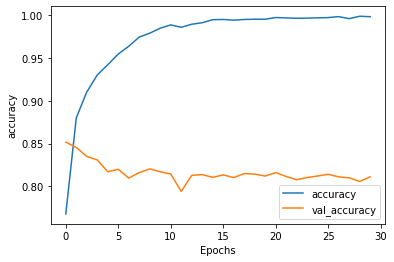

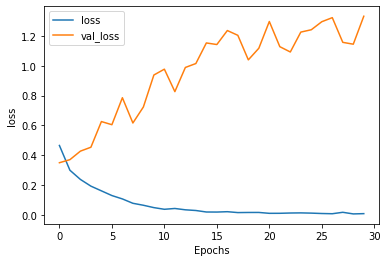

In [20]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')